In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/list-of-countries-by-sugarcane-production/List of Countries by Sugarcane Production.csv


In [4]:
df=pd.read_csv('/kaggle/input/list-of-countries-by-sugarcane-production/List of Countries by Sugarcane Production.csv')
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


# Data Cleaning  

In [5]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]= df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [6]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [7]:
df = df.drop( "Unnamed: 0", axis = 1)

In [8]:
df.isnull().sum()

Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

In [10]:
df=df.dropna().reset_index().drop('index',axis=1)

In [12]:
df.dtypes

Country                       object
Continent                     object
Production (Tons)             object
Production per Person (Kg)    object
Acreage (Hectare)             object
Yield (Kg / Hectare)          object
dtype: object

In [13]:
df["Production (Tons)"] = df["Production (Tons)"].astype(float)
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].astype(float)
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].astype(float)
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].astype(float)

In [14]:
df.dtypes

Country                        object
Continent                      object
Production (Tons)             float64
Production per Person (Kg)    float64
Acreage (Hectare)             float64
Yield (Kg / Hectare)          float64
dtype: object

In [15]:
df.describe()

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


# EDA(Expolatary data analysis)

### How many countries produce sugarcane from each continent?


In [7]:
df['Continent'].value_counts()

Continent
Africa           39
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

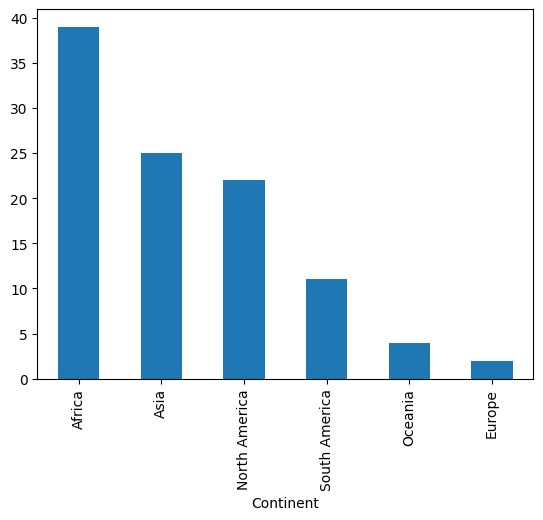

In [8]:
df['Continent'].value_counts().plot(kind='bar')

## Distribution of columns

/tmp/ipykernel_32/3844681713.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production (Tons)'], ax=axes[0, 0])
/tmp/ipykernel_32/3844681713.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production per Person (Kg)'], ax=axes[0, 1])
/tmp/ipykernel_32/3844681713.py:13: UserWarni

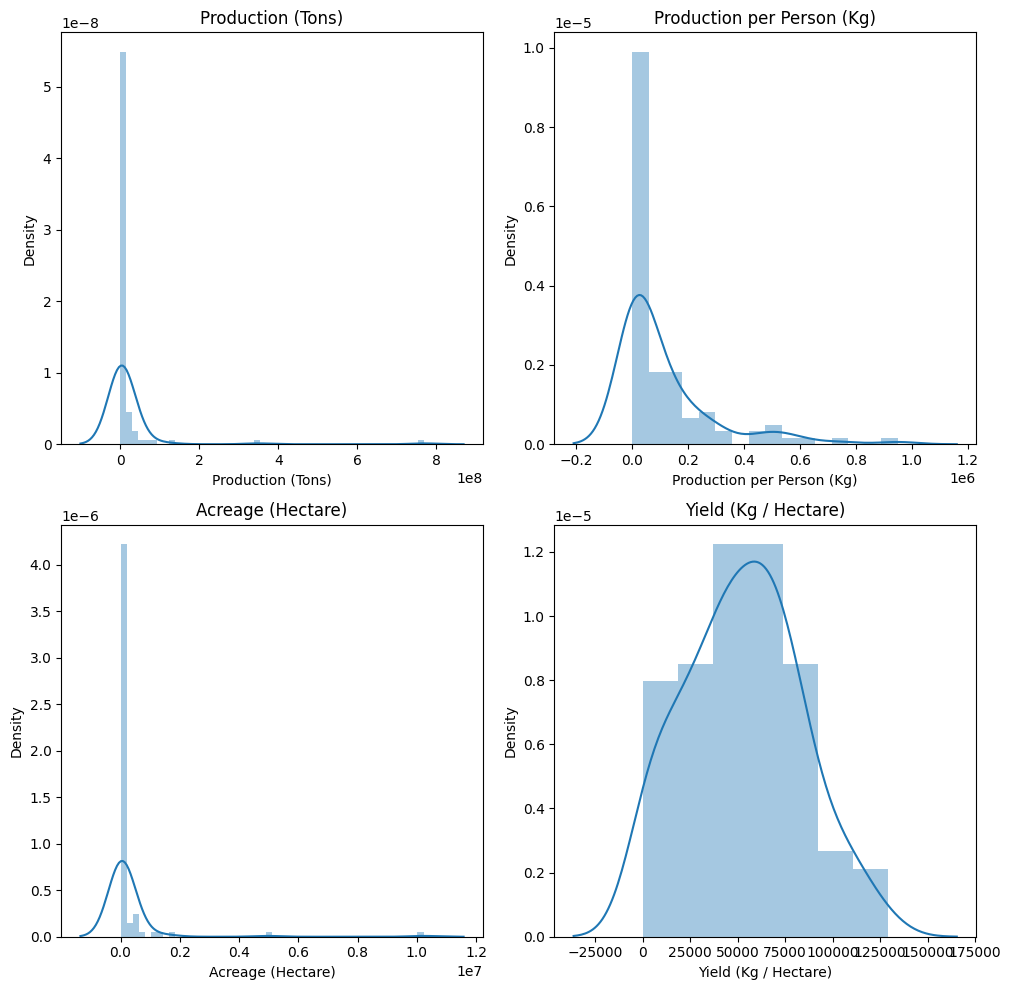

In [16]:


# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Plot on the first subplot
sns.distplot(df['Production (Tons)'], ax=axes[0, 0])
axes[0, 0].set_title('Production (Tons)')

# Plot on the second subplot
sns.distplot(df['Production per Person (Kg)'], ax=axes[0, 1])
axes[0, 1].set_title('Production per Person (Kg)')

# Plot on the third subplot
sns.distplot(df['Acreage (Hectare)'], ax=axes[1, 0])
axes[1, 0].set_title('Acreage (Hectare)')

# Plot on the fourth subplot
sns.distplot(df['Yield (Kg / Hectare)'], ax=axes[1, 1])
axes[1, 1].set_title('Yield (Kg / Hectare)')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


## Checking Outliers

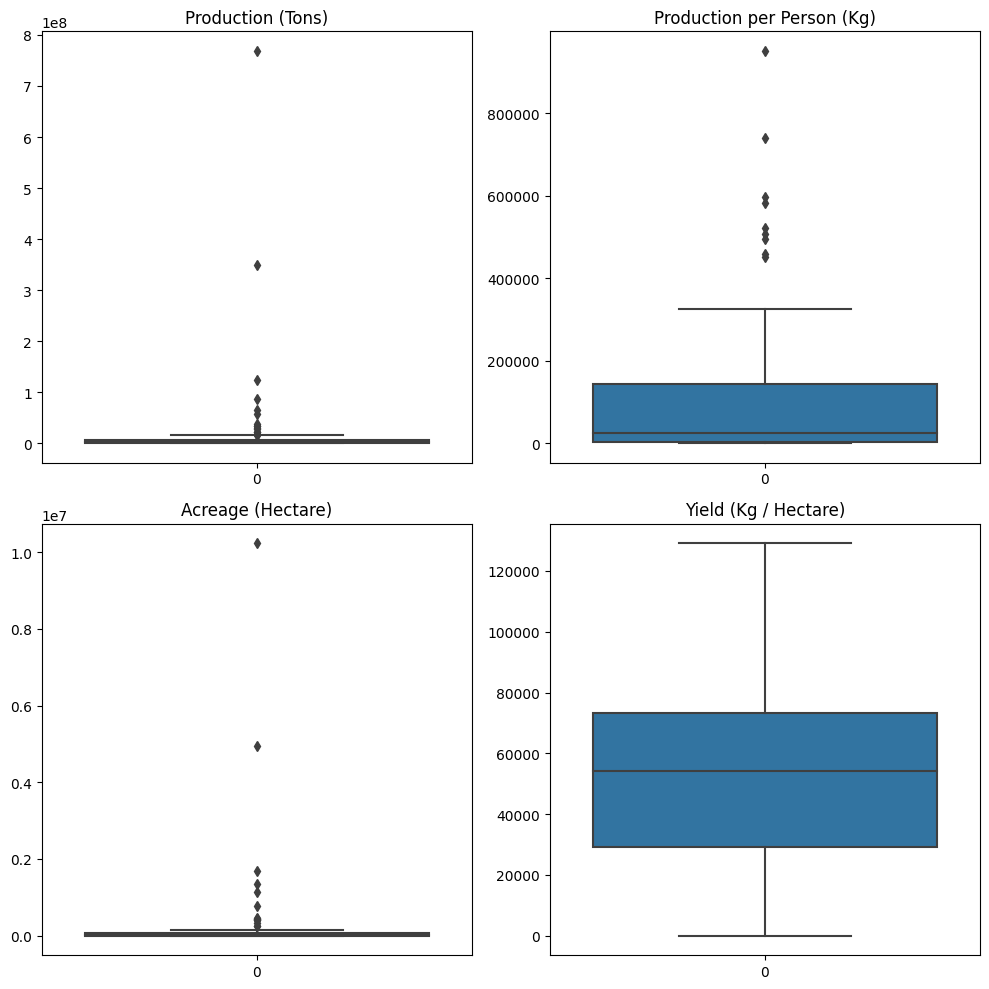

In [10]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Plot on the first subplot
sns.boxplot(df['Production (Tons)'], ax=axes[0, 0])
axes[0, 0].set_title('Production (Tons)')

# Plot on the second subplot
sns.boxplot(df['Production per Person (Kg)'], ax=axes[0, 1])
axes[0, 1].set_title('Production per Person (Kg)')

# Plot on the third subplot
sns.boxplot(df['Acreage (Hectare)'], ax=axes[1, 0])
axes[1, 0].set_title('Acreage (Hectare)')

# Plot on the fourth subplot
sns.boxplot(df['Yield (Kg / Hectare)'], ax=axes[1, 1])
axes[1, 1].set_title('Yield (Kg / Hectare)')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

The box plots reveal the presence of outliers in the data for all production-related columns. These outliers are not removed, as you intend to conduct further analysis.

### Which country produce maximum sugarcane?

In [26]:
df_new=df[["Country","Production (Tons)"]].set_index('Country')
df_new

,Production (Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Lebanon,97.0
Djibouti,53.0
Singapore,50.0


In [27]:
df_new['Production (Tons)_percent']=df_new['Production (Tons)']*100/df_new['Production (Tons)'].sum()
df_new

,Production (Tons),Production (Tons)_percent
Country,,
Brazil,768678382.0,4.072728e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Lebanon,97.0,5.139401e-06
Djibouti,53.0,2.808126e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production (Tons)_percent'>

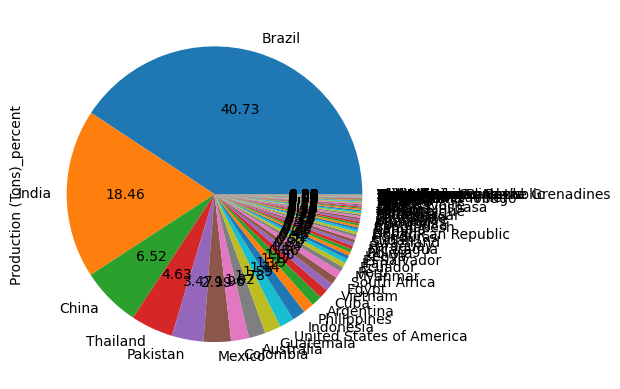

In [30]:
df_new['Production (Tons)_percent'].plot(kind='pie',autopct='%0.2f')

These three countries (Brazil, India, and China) account for 65% of sugarcane production.

### which country has highest land ? 

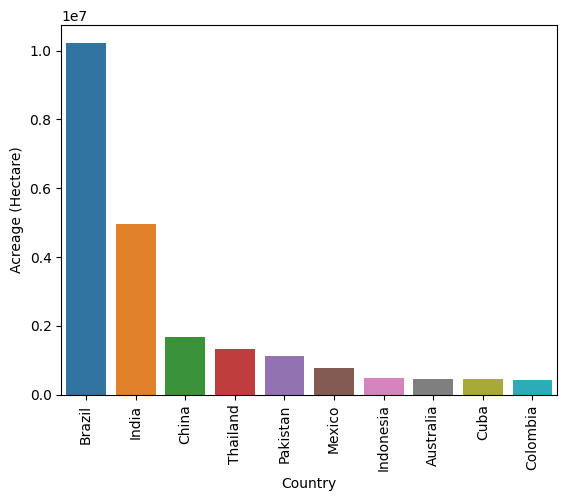

In [34]:
df_arc=df.sort_values('Acreage (Hectare)',ascending=False)
ax= sns.barplot(data=df_arc.head(10),x='Country',y='Acreage (Hectare)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

 Brazil has the highest land area

### which country has highest yield per hectare ? 

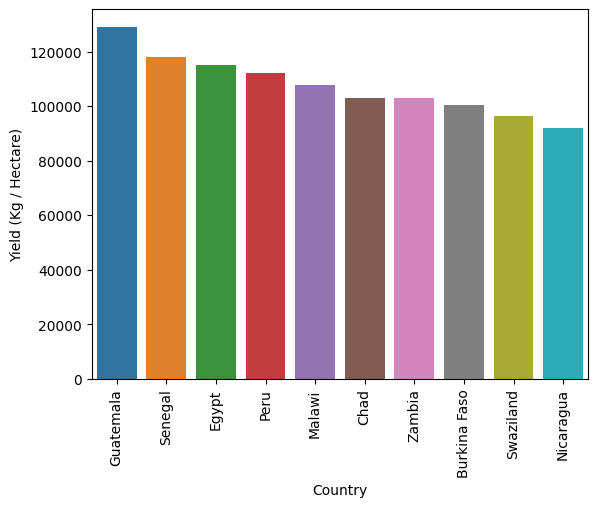

In [35]:
df_yield=df.sort_values('Yield (Kg / Hectare)',ascending=False)
ax= sns.barplot(data=df_yield.head(10),x='Country',y='Yield (Kg / Hectare)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

Guatemala has higest yield(kg/hectare)

## which country has the highest production ?

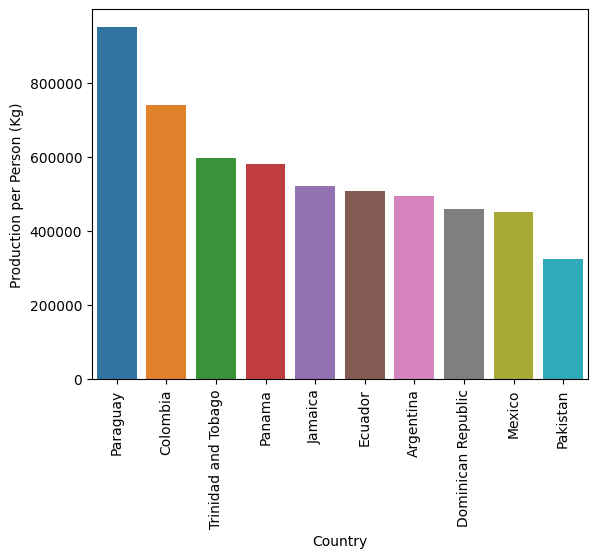

In [36]:
df_pro=df.sort_values('Production per Person (Kg)',ascending=False)
ax= sns.barplot(data=df_pro.head(10),x='Country',y='Production per Person (Kg)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### Do countries with highest land produce more sugarcane ? 

<Axes: xlabel='Acreage (Hectare)', ylabel='Production (Tons)'>

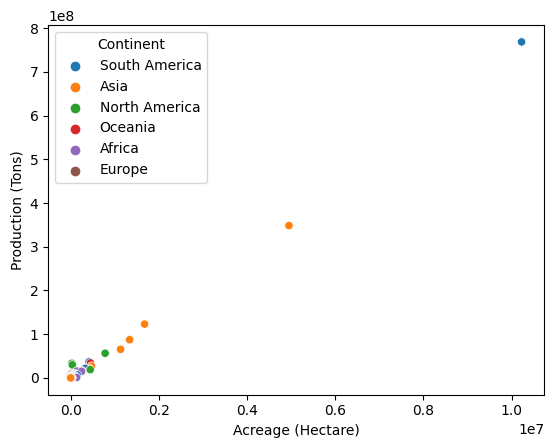

In [19]:
sns.scatterplot(data=df,x='Acreage (Hectare)',y='Production (Tons)',hue='Continent')

When the acreage increases, production also increases. Acreage and production are directly proportional.

### Do countries yield more sugarcane per hectare produce more sugarcane in total ? 

<Axes: xlabel='Yield (Kg / Hectare)', ylabel='Production (Tons)'>

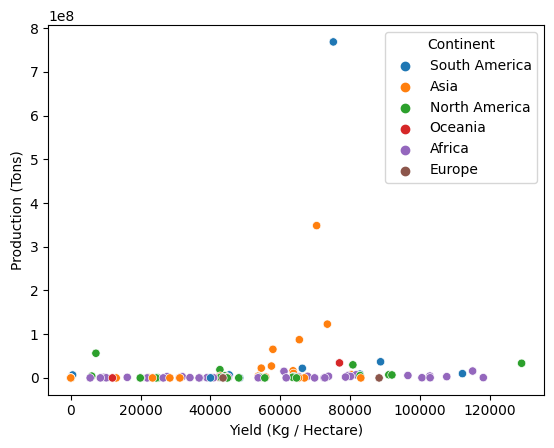

In [27]:
sns.scatterplot(data=df,x='Yield (Kg / Hectare)',y='Production (Tons)',hue='Continent')


there is no relations as the yield increase the production increase 

## Analysis for continent

In [43]:
df.columns

Index(['Country', 'Continent', 'Production (Tons)',
       'Production per Person (Kg)', 'Acreage (Hectare)',
       'Yield (Kg / Hectare)'],
      dtype='object')

In [45]:
df_continent=df.groupby('Continent').sum()
df_continent

,Country,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681525.0,2332687.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


### which continent produce maximum sugarcane ?


<Axes: xlabel='Continent'>

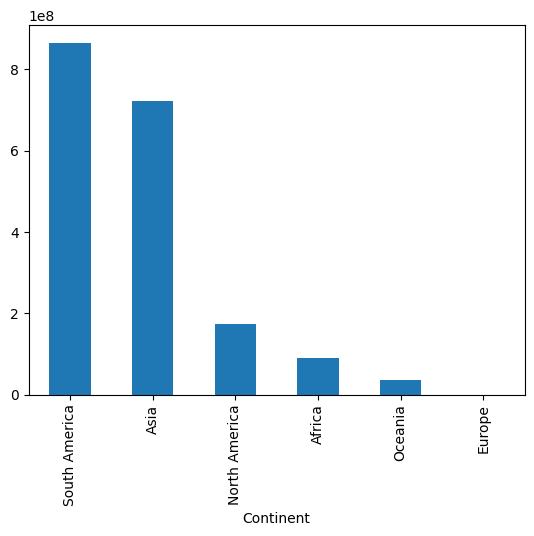

In [46]:
df_continent['Production (Tons)'].sort_values(ascending=False).plot(kind='bar')

### Do number of countries in a continent effects production of sugarcane ?

In [48]:
df_continent['number_of_countries']=df.groupby('Continent').count()['Country']
df_continent

,Country,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681525.0,2332687.293,1439089.0,2142107.5,39
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


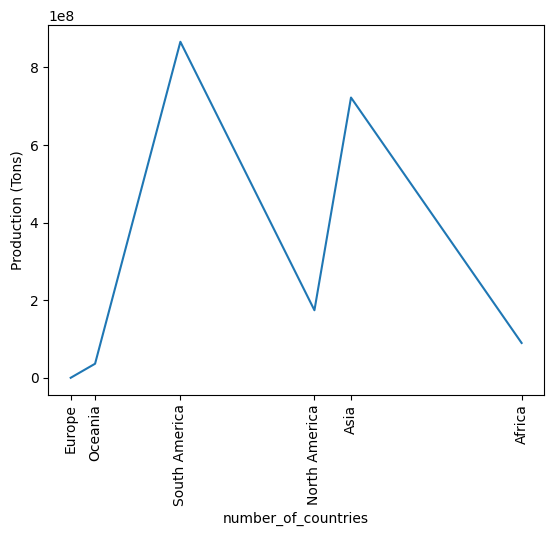

In [49]:
continent_name=df_continent.index.to_list()
sns.lineplot(data=df_continent,x='number_of_countries',y='Production (Tons)')
plt.xticks(df_continent['number_of_countries'],continent_name,rotation=90)
plt.show()

South America has the highest total sugarcane production among continents, followed by Asia and North America.

The number of countries in a continent does not necessarily correlate with the total sugarcane production in that continent. Some continents with fewer countries may have high production levels.

### Production distribution by continent

<Axes: ylabel='Production (Tons)'>

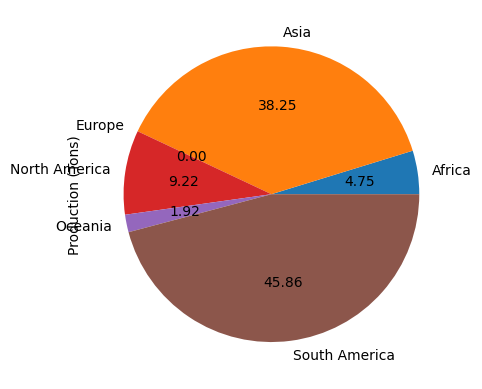

In [51]:
df_continent['Production (Tons)'].plot(kind='pie',autopct='%0.2f')

The pie chart illustrates the distribution of sugarcane production by continent. South America and Asia contribute significantly to global production.